# Getting access to our scraped dataset

In [8]:
import pandas as pd
df = pd.read_csv('Daraz_Phone_Dataset.csv')

In [9]:
df.head()

,Unnamed: 0,Product Name,Brand,Product Price,Number of Rating,Number of Reviews
0,0,Apple iPhone 14 Pro Max - Oliz Store,Apple,"Rs. 207,990",4,5.0
1,1,Apple iPhone 14 Pro - Oliz Store,Apple,"Rs. 187,990",5,1.0
2,2,Apple iPhone 14 Pro Max - EvoStore,Apple,"Rs. 226,990",5,1.0
3,3,Samsung Galaxy A03 Core Mobile Phone (2GB/32GB...,Samsung,"Rs. 12,499",4,12.0
4,4,"HONOR 70 5G ( 8GB RAM , 256GB STORAGE, 6.67 In...",Honor,"Rs. 69,990",4,3.0


# Checking if the dataset has missing values

In [10]:
df.isnull().sum()

Unnamed: 0             0
Product Name           0
Brand                  0
Product Price          0
Number of Rating       0
Number of Reviews    605
dtype: int64

### We can see that in the number of reviews there are alot of missing values because there are no reviews

## Fillling the missing value

So we are going to fill the missing values with 0 as no review can be denoted by 0

In [11]:
df.fillna(0, inplace=True)

In [12]:
df.isnull().sum()

Unnamed: 0           0
Product Name         0
Brand                0
Product Price        0
Number of Rating     0
Number of Reviews    0
dtype: int64

# Visualizing our data

## Checking which brand has highest number of phone selling on the market

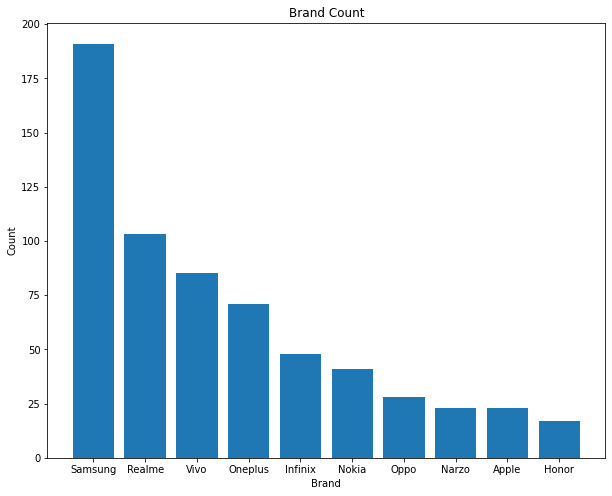

In [19]:
import matplotlib.pyplot as plt

brand_count = df['Brand'].value_counts().nlargest(10)

plt.figure(figsize=(10,8))
plt.bar(brand_count.index, brand_count.values)

plt.title('Brand Count')
plt.xlabel('Brand')
plt.ylabel('Count')

plt.show()

### Samsung is dominating in the number of phone being sold on the market

# Checking which brand has the highest mean rating

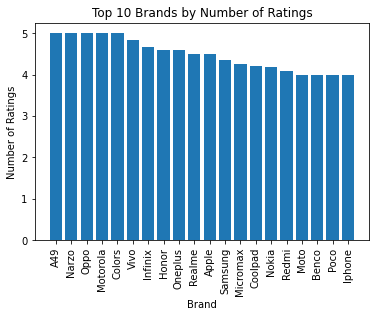

In [27]:
brand_ratings = df[df['Number of Rating'] != 0].groupby('Brand')['Number of Rating'].mean()

top_10_brands = brand_ratings.sort_values(ascending=False).head(20)

plt.bar(top_10_brands.index, top_10_brands.values)

plt.title('Top 10 Brands by Number of Ratings')
plt.xlabel('Brand')
plt.ylabel('Number of Ratings')

plt.xticks(rotation=90)

plt.show()

### A49 Narzo Oppo Motorola has the highest mean rating among other brands

# Checking which brand is the most popular according to the number of reviews

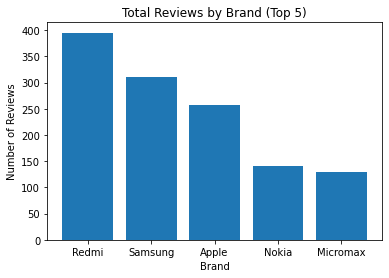

In [37]:

brand_review_counts = df.groupby('Brand')['Number of Reviews'].sum()

sorted_brands = brand_review_counts.sort_values(ascending=False)

top_5_brands = sorted_brands[:5]

plt.bar(top_5_brands.index, top_5_brands.values)

plt.title('Total Reviews by Brand (Top 5)')
plt.xlabel('Brand')
plt.ylabel('Number of Reviews')

plt.show()

### Its Redmi